In [1]:
!pip install kwant

     |████████████████████████████████| 1.6 MB 4.4 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp37-cp37m-linux_x86_64.whl size=3691032 sha256=299a07598e945a3eb21bb5c37c6bd2245b0ae84b2da8fbd530f67f438bc1a910
  Stored in directory: /root/.cache/pip/wheels/d6/2d/93/6f395cd3f0798d7d9e161dce1c8b8c8bbd04d4547763c926de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=228002 sha256=3db65d3d31d72ec696d9c02fcc078405789562701cefa06f7ec0449506a8c5f7
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


In [ ]:
import kwant
from matplotlib import pyplot as plt
import tinyarray as ta
import numpy as np
import scipy.sparse.linalg as sla
import scipy

/usr/local/lib/python3.7/dist-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


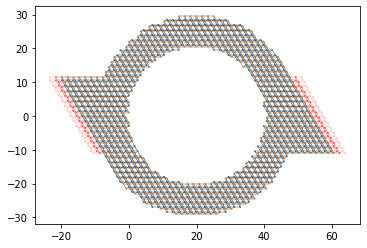

t_1 = 1, t_2 = (0.030901699437494747+0.09510565162951536j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.83% of values overflowing upper limit 0.0122739 


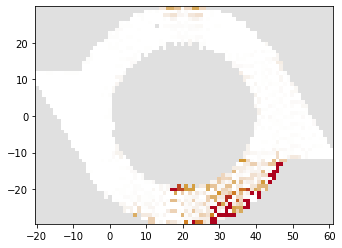

t_1 = 1, t_2 = (-0.006975647374412534+0.09975640502598243j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.37% of values overflowing upper limit 0.00963167 


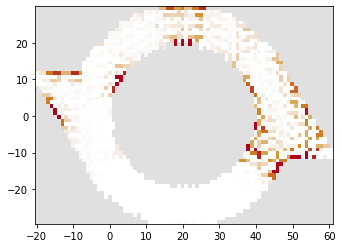

t_1 = 1, t_2 = (-0.04383711467890775+0.0898794046299167j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.78% of values overflowing upper limit 0.0106036 


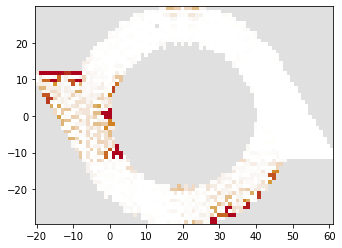

t_1 = 1, t_2 = (-0.07431448254773941+0.06691306063588584j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.88% of values overflowing upper limit 0.0107009 


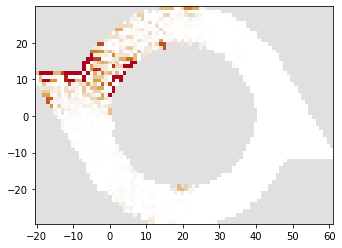

t_1 = 1, t_2 = (-0.09396926207859084+0.03420201433256689j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.88% of values overflowing upper limit 0.0125406 


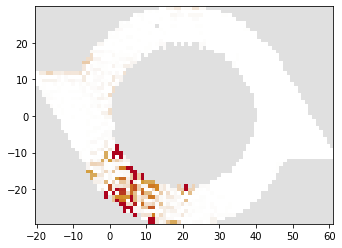

t_1 = 1, t_2 = (-0.09993908270190958-0.0034899496702500902j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.58% of values overflowing upper limit 0.0102865 


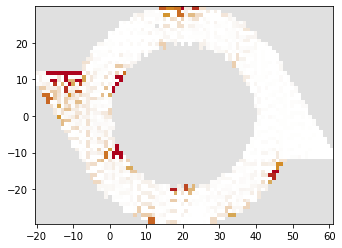

t_1 = 1, t_2 = (-0.09135454576426011-0.04067366430757999j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.53% of values overflowing upper limit 0.00855278 


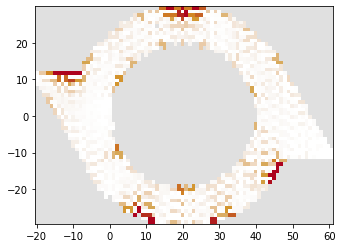

t_1 = 1, t_2 = (-0.06946583704589976-0.07193398003386509j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.73% of values overflowing upper limit 0.00845071 


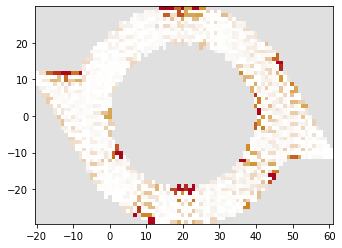

t_1 = 1, t_2 = (-0.03746065934159123-0.09271838545667874j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.88% of values overflowing upper limit 0.00984136 


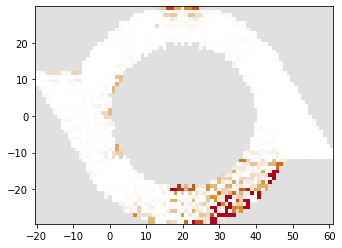

t_1 = 1, t_2 = (-1.8369701987210297e-17-0.1j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: RuntimeWarning: The plotted data contains 1.83% of values overflowing upper limit 0.00994142 


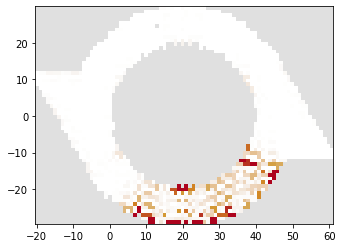

In [ ]:
def make_system(a=1, t_1=1.0, t_2=1.0, L=30, r=30):
    def rectangle(pos):
        x, y = pos
        return ((x-20) ** 2 + y ** 2 < r ** 2) and ((x-20) ** 2 + y ** 2 > (r-10) ** 2)
    
    def potential(site):
        (x, y) = site.pos
        return onsite

    R = np.array([[np.sqrt(3)/2, 1/2],[-1/2, np.sqrt(3)/2]])
    

    v_1 = [3*a/2, np.sqrt(3)*a/2]
    v_2 = [3*a/2, -np.sqrt(3)*a/2]

    r_1 = [0,0]
    r_2 = [a,0]

    lat = kwant.lattice.Polyatomic([np.dot(R,v_1), np.dot(R,v_2)], [np.dot(R,r_1), np.dot(R,r_2)], norbs=1)
    lat.a, lat.b = lat.sublattices

    syst = kwant.Builder()
    onsite = 0
    
    # Onsites
    syst[lat.shape(rectangle, (0, 0))] = potential
    # Hoppings
    hoppings = (((0, a), lat.a, lat.b), ((a, 0), lat.a, lat.b), ((-a/2, -np.sqrt(3)*a/2), lat.a, lat.b), ((-a/2, np.sqrt(3)*a/2), lat.a, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
    hoppings2_a = (((0, a), lat.a, lat.a), ((a, 0), lat.a, lat.a))
    hoppings2_b = (((0, a), lat.b, lat.b), ((a, 0), lat.b, lat.b))
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2
    
    # Leads
    # left lead
    sym0 = kwant.TranslationalSymmetry(np.dot(R,[-3*a/2, -np.sqrt(3)*a/2]))
    sym1 = kwant.TranslationalSymmetry(np.dot(R,[3*a/2, np.sqrt(3)*a/2]))
    #sym0 = kwant.TranslationalSymmetry(np.dot(R,v_1))
    #sym1 = kwant.TranslationalSymmetry(np.dot(R,v_1))
    
    def lead0_shape(pos):
        x, y = pos
        return (-0.4 * r < y < 0.4 * r)

    lead0 = kwant.Builder(sym0)
    lead0[lat.shape(lead0_shape, (0, 0))] = potential
    # Hopping
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2
    syst.attach_lead(lead0)
    
    lead1 = kwant.Builder(sym1)
    lead1[lat.shape(lead0_shape, (0, 0))] = potential
    # Hopping
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = t_1
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_a]] = t_2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2_b]] = t_2
    syst.attach_lead(lead1)
    
    syst_fin = syst.finalized()
    lead1_fin = lead1.finalized()
    
    return syst_fin, lead1_fin

def plot_bandstructure(flead, momenta, label=None, title=None):
    bands = kwant.physics.Bands(flead)
    energies = [bands(k) for k in momenta]
    
    plt.figure()
    plt.title(title)
    plt.plot(momenta, energies, label=label)
    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")

def plot_conductance(syst, energies):
    # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(energies, data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()

def plot_density(sys,ener, it=-1):
    
    wf = kwant.wave_function(sys, energy=ener)
    
    t=np.shape(wf(0))
    nwf=np.zeros(np.shape(wf(0)[0][::2]),dtype=float)
    
    
    for i in range(min(t[0],5)):

        psi=wf(0)[i]
        up, down = psi[::2], psi[1::2]
        up2=(np.abs(up))**2
        nwf+=up2
    
    
    f= nwf

    
    if it==-1:
        title="density"
    elif it>-1:
        title= "density"
        
    title2=title+".png"
    plt.title(title)
    kwant.plotter.map(sys, f,method='linear',vmax=max(nwf),vmin=0,show=False,file=title2)
    
    plt.show()
    
    plt.close()

sys, right_lead = make_system(t_1 = 1, t_2 = 0.5*np.exp(1j))
kwant.plot(sys)
kwant.plot(sys, file='haldane_rectangle_shape.pdf')

def plot_density(sys,ener, it=-1):
    
    wf = kwant.wave_function(sys, energy=ener)
    
    t=np.shape(wf(0))
    nwf=wf(0)[0]*0
    
    
    for i in range(t[0]//2+1):
        test=wf(0)[i]
        nwf+=test

    psi=abs(nwf)**2
    
    if it==-1:
        title="density"
    elif it>-1:
        title= "density"
        
    title2=title+".pdf"
    
    kwant.plotter.map(sys,psi,method='linear',vmin=0)

    J_0 = kwant.operator.Current(sys)
    c = J_0(nwf)

    kwant.plotter.current(sys, c)


    plt.close()

def plot_wave_function(sys):
    # Calculate the wave functions in the system.
    ham_mat = sys.hamiltonian_submatrix(sparse=True)
    evecs = sla.eigsh(ham_mat, k=20, which='SM')[1]

    # Plot the probability density of the 10th eigenmode.
    kwant.plotter.map(sys, np.abs(evecs[:, 9])**2,
                      colorbar=False, oversampling=1)


for phi in np.linspace(2*np.pi/5, 3*np.pi/2, 10):
    t_2 = 0.1 * np.exp(1j*phi)
    sys, right_lead = make_system(t_1 = 1, t_2 = t_2)
    print(f"t_1 = 1, t_2 = {t_2}")
    #plot_density(sys, 1)
    plot_wave_function(sys)
plt.show()

In [ ]:
R = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],[-1/np.sqrt(2), 1/np.sqrt(2)]])
print(np.dot(R,[1,0]))

[ 0.70710678 -0.70710678]


In [ ]:
def plot_probability(ham):
    phi_tab = np.linspace(0, 2*np.pi, 100)
    energies = []
    for phi in phi_tab:
        sys = make_system(t_1 = 1, t_2 = np.exp(1j*phi))
        ham = sys.hamiltonian_submatrix(sparse=True)
        e_val, e_vec = scipy.sparse.linalg.eigsh(ham, k=197, return_eigenvectors=True)
        e_val = np.sort(e_val)
        energies.append(e_val)
        
    plt.figure()
    plt.plot(phi_tab, energies)
    plt.xlabel("t2")
    plt.ylabel("energy [t]")
    plt.show()
    

plot_probability(ham)
    

NameError: ignored